<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RecSys/blob/Ariel-Chernyy-folder/Inspectrum_clinic_new_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import xlrd
import copy
import pickle
import os
import json
import re
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

from scipy.spatial import distance

import xgboost as xgb
import lightgbm as lgbm

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
#from keras.wrappers.scikit_learn import KerasClassifier


In [2]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from scikeras.wrappers import KerasClassifier

In [4]:
#from google.colab import drive
#drive.mount('/content/Drive/')

# Загрузка и первичный анализ

In [5]:
#data = pd.read_excel('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/%D1%81%D0%B5%D0%BC%D0%BF%D0%BB%20%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D0%B0.xlsx')

# новый датасет
data = pd.read_excel('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%20%D0%BF%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3%20%D1%87%D0%B0%D1%81%D1%82%D1%8C.xlsx')

In [6]:
data.shape

(1982, 4587)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Columns: 4587 entries, ДокументПрохождениеМедосмотра to Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление
dtypes: bool(1), datetime64[ns](43), float64(1253), object(3290)
memory usage: 69.3+ MB


In [8]:
data.head()

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,Оториноларингология3_Аудиометрия1_Значение,Оториноларингология3_Аудиометрия1_ЗначениеПредставление,Оториноларингология1_ЖалобыДополнение_Значение,Оториноларингология1_ЖалобыДополнение_ЗначениеПредставление,Стоматология2_ВП2_Значение,Стоматология2_ВП2_ЗначениеПредставление,Терапия2_ЗаключениеФОГК_Значение,Терапия2_ЗаключениеФОГК_ЗначениеПредставление,Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение,Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление
0,7f41ca7e-7dac-11ec-80fc-0cc47aab8067,c91e3407-b81f-11e9-80cf-0cc47aab8067,1976-10-24,Женский,Женский,2022-01-25,Периодический,Периодический,False,23c173a7-30d9-11e7-80d8-708bcd7f83cd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2ee1f9ac-83dd-11ec-80fc-0cc47aab8067,1a1a5fea-8b7f-11eb-80e8-0cc47aab8067,1987-11-18,Мужской,Мужской,2022-02-02,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9cbb191e-8e24-11ec-80fe-0cc47aab8067,7fe324e0-fa51-11eb-80f6-0cc47aab8067,1985-09-08,Мужской,Мужской,2022-02-15,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b8a33910-8eec-11ec-80fe-0cc47aab8067,98f9d761-8d65-11ec-80fe-0cc47aab8067,1988-04-25,Мужской,Мужской,2022-02-16,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0bb0d181-938c-11ec-80fe-0cc47aab8067,009aac7d-7bcf-11eb-80e8-0cc47aab8067,1984-04-17,Мужской,Мужской,2022-02-22,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Пустые значения

In [9]:
n_na = data.isna().sum()

In [10]:
print(n_na.sort_values())

ДокументПрохождениеМедосмотра                             0
Клиент                                                    0
КлиентДатаРождения                                        0
КлиентПол                                                 0
КлиентПолПредставление                                    0
                                                       ... 
ПсихиатрияНаркология1_Противопоказание2                1982
ПсихиатрияНаркология1_Классификация3Представление2     1982
ПсихиатрияНаркология1_Классификация32                  1982
УЗИДиагностика2_Классификация1Представление2           1982
ПроцедурнаяМедсестра1_ХР_Рекомендация2Представление    1982
Length: 4587, dtype: int64


In [11]:
print(n_na.value_counts().sort_index(ascending=False))

1982    884
1981    350
1980    589
1979     79
1978     87
       ... 
241       5
240      11
237       1
236       3
0        12
Length: 291, dtype: int64


In [12]:
data[n_na[n_na==0].index.tolist()].head()

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,Профессия,ВредныеФакторы
0,7f41ca7e-7dac-11ec-80fc-0cc47aab8067,c91e3407-b81f-11e9-80cf-0cc47aab8067,1976-10-24,Женский,Женский,2022-01-25,Периодический,Периодический,False,23c173a7-30d9-11e7-80d8-708bcd7f83cd,Ведущий специалист по организации обуения,11.4
1,2ee1f9ac-83dd-11ec-80fc-0cc47aab8067,1a1a5fea-8b7f-11eb-80e8-0cc47aab8067,1987-11-18,Мужской,Мужской,2022-02-02,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,Ведущий специалист,4.2.5
2,9cbb191e-8e24-11ec-80fe-0cc47aab8067,7fe324e0-fa51-11eb-80f6-0cc47aab8067,1985-09-08,Мужской,Мужской,2022-02-15,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,Главный менеджер,4.2.5
3,b8a33910-8eec-11ec-80fe-0cc47aab8067,98f9d761-8d65-11ec-80fe-0cc47aab8067,1988-04-25,Мужской,Мужской,2022-02-16,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,Главный специалист,11.1
4,0bb0d181-938c-11ec-80fe-0cc47aab8067,009aac7d-7bcf-11eb-80e8-0cc47aab8067,1984-04-17,Мужской,Мужской,2022-02-22,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,Старший специалист,11.1


In [13]:
print(f'{n_na.value_counts().sort_index(ascending=False)[1982]} колонок с только пустыми значениями',
      f'{n_na.value_counts().sort_index(ascending=False)[1981]} колонок с 1 непустым значением',
      f'{n_na.value_counts().sort_index(ascending=False)[1980]} колонок с 2 непустыми значениями', 
      sep = '\n')

884 колонок с только пустыми значениями
350 колонок с 1 непустым значением
589 колонок с 2 непустыми значениями


#### (!) в примере датасета много пустых или почти пустых (1 или 2 непустых значения) колонок. хотелось бы отбросить их, но неизвестно, будут ли они пустыми в полном датасете. 

#### (!) пока не удаляю пустые столбцы, т.к. хочу дальше поискать способ обработки столбцов по группам

In [14]:
full_columns = n_na[n_na == 0].index.tolist()
full_columns

['ДокументПрохождениеМедосмотра',
 'Клиент',
 'КлиентДатаРождения',
 'КлиентПол',
 'КлиентПолПредставление',
 'ДатаЗавершенияМедосмотра',
 'ТипМедосмотра',
 'ТипМедосмотраПредставление',
 'ПсихОсвидетельствование',
 'Контрагент',
 'Профессия',
 'ВредныеФакторы']

# Группы факторов

буду собирать обработанные (готовые к подаче в нейронку) факторы в DataFrame X, обработанную зависимую переменную положу в DataFrame target

In [15]:
X = pd.DataFrame(index=data.index)

In [16]:
cols_no_digits = []
cols_w_digits = []
for x in data.columns:
  if len(re.findall(r'\d', x)) > 0:
    cols_w_digits.append(x)
  else:
    cols_no_digits.append(x)
print(len(cols_no_digits), len(cols_w_digits))

18 4569


In [17]:
print(cols_no_digits)

['ДокументПрохождениеМедосмотра', 'Клиент', 'КлиентДатаРождения', 'КлиентПол', 'КлиентПолПредставление', 'ДатаЗавершенияМедосмотра', 'ТипМедосмотра', 'ТипМедосмотраПредставление', 'ПсихОсвидетельствование', 'Контрагент', 'Цех', 'Профессия', 'ЗаключениеМК', 'ЗаключениеМКПредставление', 'Заключение', 'ДиспансернаяГруппа', 'ДиспансернаяГруппаПредставление', 'ВредныеФакторы']


In [18]:
data[cols_no_digits].head()

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,Цех,Профессия,ЗаключениеМК,ЗаключениеМКПредставление,Заключение,ДиспансернаяГруппа,ДиспансернаяГруппаПредставление,ВредныеФакторы
0,7f41ca7e-7dac-11ec-80fc-0cc47aab8067,c91e3407-b81f-11e9-80cf-0cc47aab8067,1976-10-24,Женский,Женский,2022-01-25,Периодический,Периодический,False,23c173a7-30d9-11e7-80d8-708bcd7f83cd,NaN,Ведущий специалист по организации обуения,Годен,Годен к работе в указанных условиях,Годен к работе в указанных условиях,I,I,11.4
1,2ee1f9ac-83dd-11ec-80fc-0cc47aab8067,1a1a5fea-8b7f-11eb-80e8-0cc47aab8067,1987-11-18,Мужской,Мужской,2022-02-02,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,NaN,Ведущий специалист,Годен,Годен к работе в указанных условиях,Годен к работе в указанных условиях,IIIа,IIIа,4.2.5
2,9cbb191e-8e24-11ec-80fe-0cc47aab8067,7fe324e0-fa51-11eb-80f6-0cc47aab8067,1985-09-08,Мужской,Мужской,2022-02-15,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,NaN,Главный менеджер,ГоденСКоррекциейЗрения,Годен к работе в указанных условиях (с коррекц...,Годен к работе в указанных условиях (с коррекц...,II,II,4.2.5
3,b8a33910-8eec-11ec-80fe-0cc47aab8067,98f9d761-8d65-11ec-80fe-0cc47aab8067,1988-04-25,Мужской,Мужской,2022-02-16,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,Отдел техники и технологии строительства скважин,Главный специалист,Годен,Годен к работе в указанных условиях,Годен к работе в указанных условиях,I,I,11.1
4,0bb0d181-938c-11ec-80fe-0cc47aab8067,009aac7d-7bcf-11eb-80e8-0cc47aab8067,1984-04-17,Мужской,Мужской,2022-02-22,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,Отдел технологий текущего и капитального ремон...,Старший специалист,ГоденСКоррекциейЗрения,Годен к работе в указанных условиях (с коррекц...,Годен к работе в указанных условиях (с коррекц...,II,II,11.1


### обработка столбца "вредные факторы"

In [19]:
factors_list = []
for elem in data['ВредныеФакторы']:
  factors_list += elem.split(',')
factors_list = list(set(factors_list))
factors_list

['9',
 '1.49.14',
 '4.10',
 '14',
 '4.1',
 '18',
 '26',
 '1.8.2.1',
 '1.8.1.2',
 '1.15',
 '3.1',
 '6.2',
 '15',
 '17',
 '6.1',
 '1.29.4',
 '10',
 '1.37.1.2',
 '1.19.1',
 '1.49.2',
 '18.2',
 '1.37.1',
 '11.2',
 '12',
 '1.49',
 '11',
 '4.2.3',
 '4.5',
 '18.1',
 '22',
 '1.8.3.1',
 '4.4',
 '3.1.7',
 '1.14.1',
 '1.30.1',
 '3.1.8.3',
 '6',
 '1.37.1.1',
 '11.1',
 '1.48',
 '11.4',
 '5.2',
 '1.46',
 '5.1',
 '1.18.3',
 '4.6',
 'II',
 '4.2.4',
 '8',
 '1.36.1',
 '2.4.3',
 '1.14.2',
 '4.3.2',
 '1.29.2',
 '24',
 '1.1',
 '1.8.3.2',
 '1.3',
 'Годен к работе в указанных условиях',
 '1.8.2.2',
 '1.37',
 '1.8.1.1',
 '23',
 '1.8.1',
 '1.2',
 '1.45.1',
 '4.2.5',
 '1.36',
 '2.4',
 '1.34.1',
 '1.29.1',
 '4.7',
 '4.2',
 '1.23',
 '3.1.2',
 'IIIа',
 '1.8.2',
 '4.9',
 '3.4',
 '4.2.1',
 '3.1.8.1',
 '1.29',
 '27',
 '1.39',
 '3.1.8.2',
 '4.8',
 '1.8.3',
 '5.2.1',
 '1.24',
 '1.50',
 '13',
 '11.3',
 '4.3.1',
 '25',
 '1.17']

#### (!) кажется, все-таки и в новом датасете есть ошибки в выгрузке.

In [20]:
data[['Клиент', 'ЗаключениеМК', 'ЗаключениеМКПредставление', 'Заключение', 'ВредныеФакторы']][data['ВредныеФакторы'].str.contains('Годен к работе в указанных условиях')|data['ВредныеФакторы'].str.contains('II')|data['ВредныеФакторы'].str.contains('IIIа')]

,Клиент,ЗаключениеМК,ЗаключениеМКПредставление,Заключение,ВредныеФакторы
843,956edb54-4047-11ec-80fa-0cc47aab8067,машинист бульдозера,тракторист,стропальщик,Годен к работе в указанных условиях
851,725f3c56-e14d-11e7-80de-708bcd7f83cd,Газоспасатель,ГоденСКоррекциейЗрения,Годен к работе в указанных условиях (с коррекц...,IIIа
1022,60653387-410f-11ec-80fa-0cc47aab8067,Газоспасатель,Годен,Годен к работе в указанных условиях,II
1024,abe3549b-4042-11ec-80fa-0cc47aab8067,Газоспасатель,Годен,Годен к работе в указанных условиях,II


In [21]:
# оставляю среди вредных факторов только правильно закодированные
factors_list = sorted([x for x in factors_list if len(re.findall(r'\d',x))>0], key = lambda x: [int(s) for s in x.split('.')])
print(len(factors_list))
factors_list

92


['1.1',
 '1.2',
 '1.3',
 '1.8.1',
 '1.8.1.1',
 '1.8.1.2',
 '1.8.2',
 '1.8.2.1',
 '1.8.2.2',
 '1.8.3',
 '1.8.3.1',
 '1.8.3.2',
 '1.14.1',
 '1.14.2',
 '1.15',
 '1.17',
 '1.18.3',
 '1.19.1',
 '1.23',
 '1.24',
 '1.29',
 '1.29.1',
 '1.29.2',
 '1.29.4',
 '1.30.1',
 '1.34.1',
 '1.36',
 '1.36.1',
 '1.37',
 '1.37.1',
 '1.37.1.1',
 '1.37.1.2',
 '1.39',
 '1.45.1',
 '1.46',
 '1.48',
 '1.49',
 '1.49.2',
 '1.49.14',
 '1.50',
 '2.4',
 '2.4.3',
 '3.1',
 '3.1.2',
 '3.1.7',
 '3.1.8.1',
 '3.1.8.2',
 '3.1.8.3',
 '3.4',
 '4.1',
 '4.2',
 '4.2.1',
 '4.2.3',
 '4.2.4',
 '4.2.5',
 '4.3.1',
 '4.3.2',
 '4.4',
 '4.5',
 '4.6',
 '4.7',
 '4.8',
 '4.9',
 '4.10',
 '5.1',
 '5.2',
 '5.2.1',
 '6',
 '6.1',
 '6.2',
 '8',
 '9',
 '10',
 '11',
 '11.1',
 '11.2',
 '11.3',
 '11.4',
 '12',
 '13',
 '14',
 '15',
 '17',
 '18',
 '18.1',
 '18.2',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27']

In [22]:
X_adverse_factors = pd.DataFrame({'adverse_factor_' + elem: data['ВредныеФакторы'].apply(lambda x: 1 if elem in x.split(',') else 0) for elem in factors_list}, index = data.index)
print(X_adverse_factors.shape)
X_adverse_factors

(1982, 92)


,adverse_factor_1.1,adverse_factor_1.2,adverse_factor_1.3,adverse_factor_1.8.1,adverse_factor_1.8.1.1,adverse_factor_1.8.1.2,adverse_factor_1.8.2,adverse_factor_1.8.2.1,adverse_factor_1.8.2.2,adverse_factor_1.8.3,...,adverse_factor_17,adverse_factor_18,adverse_factor_18.1,adverse_factor_18.2,adverse_factor_22,adverse_factor_23,adverse_factor_24,adverse_factor_25,adverse_factor_26,adverse_factor_27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
X_adverse_factors.sum(axis=1)[X_adverse_factors.sum(axis=1)==0]

843     0
851     0
1022    0
1024    0
dtype: int64

In [24]:
X_adverse_factors.sum().sort_values()

adverse_factor_1.8.3      1
adverse_factor_2.4        1
adverse_factor_2.4.3      1
adverse_factor_1.36       1
adverse_factor_1.46       1
                       ... 
adverse_factor_5.1      351
adverse_factor_6.1      351
adverse_factor_4.2.5    356
adverse_factor_4.4      432
adverse_factor_11.1     523
Length: 92, dtype: int64

In [25]:
adverse_factors_aux_info = pd.DataFrame(X_adverse_factors.sum(), columns = ['n_occurences'])
adverse_factors_aux_info.sort_values('n_occurences')

,n_occurences
adverse_factor_1.8.3,1
adverse_factor_2.4,1
adverse_factor_2.4.3,1
adverse_factor_1.36,1
adverse_factor_1.46,1
...,...
adverse_factor_5.1,351
adverse_factor_6.1,351
adverse_factor_4.2.5,356
adverse_factor_4.4,432


In [26]:
for i in np.arange(0.1,1,0.1):
  print(f'{int(np.round(i*100,0))}% вредных факторов встречаются не более чем у {np.round(adverse_factors_aux_info.quantile(i).values[0]/len(data)*100,1)} % осмотренных')

10% вредных факторов встречаются не более чем у 0.1 % осмотренных
20% вредных факторов встречаются не более чем у 0.1 % осмотренных
30% вредных факторов встречаются не более чем у 0.3 % осмотренных
40% вредных факторов встречаются не более чем у 0.5 % осмотренных
50% вредных факторов встречаются не более чем у 0.9 % осмотренных
60% вредных факторов встречаются не более чем у 1.6 % осмотренных
70% вредных факторов встречаются не более чем у 2.6 % осмотренных
80% вредных факторов встречаются не более чем у 4.2 % осмотренных
90% вредных факторов встречаются не более чем у 9.5 % осмотренных


In [27]:
X_adverse_factors.sum()[X_adverse_factors.sum()<0.009*len(data)]

adverse_factor_1.2          4
adverse_factor_1.8.1        1
adverse_factor_1.8.2        1
adverse_factor_1.8.2.1     15
adverse_factor_1.8.2.2      7
adverse_factor_1.8.3        1
adverse_factor_1.8.3.1      7
adverse_factor_1.8.3.2      7
adverse_factor_1.14.1       2
adverse_factor_1.15        10
adverse_factor_1.17         2
adverse_factor_1.18.3      11
adverse_factor_1.23         8
adverse_factor_1.24         3
adverse_factor_1.29         1
adverse_factor_1.29.4       9
adverse_factor_1.36         1
adverse_factor_1.37         4
adverse_factor_1.37.1.1     6
adverse_factor_1.37.1.2     2
adverse_factor_1.45.1       2
adverse_factor_1.46         1
adverse_factor_1.48        10
adverse_factor_1.49         7
adverse_factor_1.49.2       1
adverse_factor_1.49.14      3
adverse_factor_2.4          1
adverse_factor_2.4.3        1
adverse_factor_3.1          3
adverse_factor_3.1.2       11
adverse_factor_3.1.8.1      6
adverse_factor_3.1.8.2      9
adverse_factor_3.1.8.3      2
adverse_fa

#### (!) многие вредные факторы встречаются только один или несколько раз. можно было бы запихнуть их все в фичу "прочие". Правда непонятно, сохранятся ли пропорции в полном датасете 

In [28]:
X_adverse_factors.head()

,adverse_factor_1.1,adverse_factor_1.2,adverse_factor_1.3,adverse_factor_1.8.1,adverse_factor_1.8.1.1,adverse_factor_1.8.1.2,adverse_factor_1.8.2,adverse_factor_1.8.2.1,adverse_factor_1.8.2.2,adverse_factor_1.8.3,...,adverse_factor_17,adverse_factor_18,adverse_factor_18.1,adverse_factor_18.2,adverse_factor_22,adverse_factor_23,adverse_factor_24,adverse_factor_25,adverse_factor_26,adverse_factor_27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Зависимая переменная

In [29]:
data[['ЗаключениеМК', 'ЗаключениеМКПредставление','Заключение']]

,ЗаключениеМК,ЗаключениеМКПредставление,Заключение
0,Годен,Годен к работе в указанных условиях,Годен к работе в указанных условиях
1,Годен,Годен к работе в указанных условиях,Годен к работе в указанных условиях
2,ГоденСКоррекциейЗрения,Годен к работе в указанных условиях (с коррекц...,Годен к работе в указанных условиях (с коррекц...
3,Годен,Годен к работе в указанных условиях,Годен к работе в указанных условиях
4,ГоденСКоррекциейЗрения,Годен к работе в указанных условиях (с коррекц...,Годен к работе в указанных условиях (с коррекц...
...,...,...,...
1977,NaN,NaN,NaN
1978,NaN,NaN,NaN
1979,NaN,NaN,NaN
1980,NaN,NaN,NaN


#### (!) значения na в "заключениях..." - вероятно, ошибки в выгрузке

In [30]:
data[['ЗаключениеМК', 'ЗаключениеМКПредставление','Заключение']].isna().sum()

ЗаключениеМК                 407
ЗаключениеМКПредставление    407
Заключение                   419
dtype: int64

#### удаляю строки с na в "заключениях..."

In [31]:
data = data[data['ЗаключениеМК'].notna()]
print(data.shape)

(1575, 4587)


#### (?) какое из "заключений" является нашей зависимой переменной?

In [32]:
data[['ЗаключениеМК','ЗаключениеМКПредставление','Заключение']][(data['ЗаключениеМКПредставление']!=data['Заключение'])]

,ЗаключениеМК,ЗаключениеМКПредставление,Заключение
23,ГоденСКоррекциейЗрения,Годен к работе в указанных условиях (с коррекц...,Годен к работе в указанных условиях (с коррекц...
115,ГоденБезРаботНаВысотах,Годен к работе в указанных условиях (без работ...,Годен к работе в указанных условиях (без работ...
224,ГоденСКоррекциейЗрения,Годен к работе в указанных условиях (с коррекц...,Годен к работе в указанных условиях (с коррекц...
341,Годен,Годен к работе в указанных условиях,NaN
342,Годен,Годен к работе в указанных условиях,NaN
343,Годен,Годен к работе в указанных условиях,NaN
391,Годен,Годен к работе в указанных условиях,"Годен к работе в указанных условиях, кроме п 6.2"
393,Годен,Годен к работе в указанных условиях,NaN
394,Годен,Годен к работе в указанных условиях,NaN
438,Годен,Годен к работе в указанных условиях,NaN


In [33]:
target_raw = data['ЗаключениеМК']

In [34]:
target_raw.value_counts()

Годен                               1434
ГоденСКоррекциейЗрения               123
ВременноНегоден                        9
НуждаетсяВДообследованииИЛечении       2
ОграниченноГоден                       2
Газоспасатель                          2
ГоденБезРаботНаВысотах                 1
машинист бульдозера                    1
 Газоспасатель                         1
Name: ЗаключениеМК, dtype: int64

#### удаляю строки с ошибками в выгрузке (которые ранее вылезли в обработке "вредных факторов")

In [35]:
data = data[(~data['ЗаключениеМК'].str.contains('Газоспасатель'))&(~data['ЗаключениеМК'].str.contains('машинист бульдозера'))]
print(data.shape)

(1571, 4587)


In [36]:
target_raw = data['ЗаключениеМК']
target_raw.value_counts()

Годен                               1434
ГоденСКоррекциейЗрения               123
ВременноНегоден                        9
НуждаетсяВДообследованииИЛечении       2
ОграниченноГоден                       2
ГоденБезРаботНаВысотах                 1
Name: ЗаключениеМК, dtype: int64

#### (?)(!) в датасете очень мало примеров класса "не годен". Не может ли так получиться, что существует конечный перечень значений каких-то факторов (который было бы здорово получить от заказчика), при котором "не годен" ставится автоматически, т.е. на которые не надо именно обучать модель? в практическом применении это будет жесткий if-then еще до модели, а из обучения такие строки было бы правильно исключить, чтобы не переобучать модель.


In [37]:
yes = np.where(target_raw=='Годен', 1, 0)
no = np.where((target_raw=='ВременноНегоден')|(target_raw=='НуждаетсяВДообследованииИЛечении'), 1, 0)
maybe = np.where((yes!=1)&(no!=1), 1,0)

target = pd.DataFrame({'yes':yes, 'maybe':maybe, 'no':no}, index = data.index)
target

,yes,maybe,no
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
1961,1,0,0
1962,1,0,0
1972,1,0,0
1973,1,0,0


In [38]:
target[(target['maybe']==1)|(target['no']==1)]

,yes,maybe,no
2,0,1,0
4,0,1,0
6,0,1,0
10,0,1,0
19,0,1,0
...,...,...,...
1906,0,1,0
1921,0,1,0
1945,0,1,0
1947,0,1,0


In [39]:
target.sum()

yes      1434
maybe     126
no         11
dtype: int64

In [40]:
target_stacked = np.select([target_raw=='Годен', 
                            (target_raw!='Годен')&(target_raw!='Временно не годен')&(target_raw!='НуждаетсяВДообследованииИЛечении'),
                            (target_raw=='ВременноНегоден')|(target_raw=='НуждаетсяВДообследованииИЛечении')],
                           ['Годен', 'Ограниченно годен', 'Не годен'])
target_stacked = pd.DataFrame(target_stacked, index = data.index, columns = ['Годность'])
target_stacked

,Годность
0,Годен
1,Годен
2,Ограниченно годен
3,Годен
4,Ограниченно годен
...,...
1961,Годен
1962,Годен
1972,Годен
1973,Годен


#### на всякий случай сохраняю список колонок, в которых содержатся "не NA" для "не годных" или "ограниченно годных" - скорее всего, они содержат важную информацию.

In [41]:
columns_aux_not_good = data[(target_stacked['Годность']=='Не годен')|(target_stacked['Годность']=='Ограниченно годен')].notna().sum()
columns_aux_not_good_w_data = columns_aux_not_good[columns_aux_not_good>0].index.tolist()
print(len(columns_aux_not_good_w_data))
columns_aux_not_good_w_data

2592


['ДокументПрохождениеМедосмотра',
 'Клиент',
 'КлиентДатаРождения',
 'КлиентПол',
 'КлиентПолПредставление',
 'ДатаЗавершенияМедосмотра',
 'ТипМедосмотра',
 'ТипМедосмотраПредставление',
 'ПсихОсвидетельствование',
 'Контрагент',
 'Цех',
 'Профессия',
 'ЗаключениеМК',
 'ЗаключениеМКПредставление',
 'Заключение',
 'ДиспансернаяГруппа',
 'ДиспансернаяГруппаПредставление',
 'ВредныеФакторы',
 'ЛабораторныеИсследования1_ДокументПрием',
 'ЛабораторныеИсследования1_ДатаПриема',
 'ЛабораторныеИсследования1_Салон',
 'ЛабораторныеИсследования1_СалонПредставление',
 'ЛабораторныеИсследования1_Специализация',
 'ЛабораторныеИсследования1_СпециализацияПредставление',
 'ЛабораторныеИсследования1_ОАК_Значение',
 'ЛабораторныеИсследования1_ОАК_ЗначениеПредставление',
 'ЛабораторныеИсследования1_Биохимия_Значение',
 'ЛабораторныеИсследования1_Биохимия_ЗначениеПредставление',
 'ЛабораторныеИсследования1_ОАМ_Значение',
 'ЛабораторныеИсследования1_ОАМ_ЗначениеПредставление',
 'ЛабораторныеИсследования1_Ма

## наконец-то сами группы факторов :)

In [42]:
feature_groups = sorted(list(set([x[:re.search(r'\d', x).start()+1] for x in cols_w_digits])))
print(len(feature_groups))
feature_groups

43


['Гинекология1',
 'Гинекология2',
 'Гинекология3',
 'Гинекология4',
 'Дерматовенерология1',
 'Дерматовенерология2',
 'ЛабораторныеИсследования1',
 'ЛабораторныеИсследования2',
 'Неврология1',
 'Неврология2',
 'Оториноларингология1',
 'Оториноларингология2',
 'Оториноларингология3',
 'Офтальмология1',
 'Офтальмология2',
 'ПроцедурнаяМедсестра1',
 'Психиатрия1',
 'Психиатрия2',
 'Психиатрия3',
 'Психиатрия4',
 'ПсихиатрияНаркология1',
 'ПсихиатрияНаркология2',
 'Рентгенология1',
 'Рентгенология2',
 'Стоматология1',
 'Стоматология2',
 'ТерапевтНеИсп1',
 'Терапия1',
 'Терапия2',
 'Терапия3',
 'Терапия4',
 'УЗИДиагностика1',
 'УЗИДиагностика2',
 'ФункциональнаяДиагностика1',
 'ФункциональнаяДиагностика2',
 'ХирургНеИсп1',
 'ХирургНеИсп2',
 'Хирургия1',
 'Хирургия2',
 'Хирургия3',
 'ЭКГНеИсп1',
 'Эндоскопия1',
 'Эндоскопия2']

#### (!) в новом датасете 43 группы показателей по разным типам обследований. В перспективе можно будет подавать их в отдельные куски нейронки, чтобы на выходе из соответствующего куска получать агрегированный показатель по типу обследования

In [43]:
n_columns = [len(data.columns[data.columns.str.contains(x)]) for x in feature_groups]
feature_groups_info = pd.DataFrame({'n_columns': n_columns}, index = feature_groups)
feature_groups_info

,n_columns
Гинекология1,171
Гинекология2,127
Гинекология3,109
Гинекология4,109
Дерматовенерология1,105
Дерматовенерология2,71
ЛабораторныеИсследования1,55
ЛабораторныеИсследования2,53
Неврология1,111
Неврология2,107


## посмотрю на отдельные группы, чтобы выявить закономерности

In [44]:
columns_to_keep = []

#### буду собирать столбцы, которые надо оставить в модели, в отдельный список. потом по столбцам в этом списке будет долгий preprocessing - one-hot encoding, возможно - создание категориальных переменных-диапазонов для непрерывных факторов (напр. вес, возраст), обработка текстовых колонок итд...

### - 'Гинекология1'

In [45]:
q = data.columns[data.columns.str.contains('Гинекология1')].tolist()
print(len(q))
q

171


['Гинекология1_ДокументПрием',
 'Гинекология1_ДатаПриема',
 'Гинекология1_Салон',
 'Гинекология1_СалонПредставление',
 'Гинекология1_Специализация',
 'Гинекология1_СпециализацияПредставление',
 'Гинекология1_ХР_Рекомендация1',
 'Гинекология1_ХР_Рекомендация1Представление',
 'Гинекология1_ХР_Рекомендация2',
 'Гинекология1_ХР_Рекомендация2Представление',
 'Гинекология1_ХР_РекомендацияСтр',
 'Гинекология1_МКБ101',
 'Гинекология1_ДиагнозПредставление1',
 'Гинекология1_Детализация1',
 'Гинекология1_Классификация11',
 'Гинекология1_Классификация1Представление1',
 'Гинекология1_Классификация21',
 'Гинекология1_Классификация2Представление1',
 'Гинекология1_Классификация31',
 'Гинекология1_Классификация3Представление1',
 'Гинекология1_Противопоказание1',
 'Гинекология1_ПротивопоказаниеПредставление1',
 'Гинекология1_Профессиональное1',
 'Гинекология1_ПрофнепригодностьВременная1',
 'Гинекология1_ПрофнепригодностьВременнаяПредставление1',
 'Гинекология1_ДатаПриема_Значение',
 'Гинекология1_ДатаПр

In [46]:
def check_one_to_one_rel(col_1, col_2, data):
  aux_1 = sum(data[col_1].notna() == data[col_2].notna())
  cond_1 = len(data)==aux_1
  aux_pivot = data[[col_1,col_2]].pivot_table( index = col_1, columns = col_2, aggfunc='size', dropna=False)
  #aux_2 = np.trace(aux_pivot.values)
  cond_2 = sum(aux_pivot.notna().sum())==sum(aux_pivot.notna().sum(axis=1))==len(aux_pivot)
  #cond_2 = aux_2 == sum(data[col_1].notna())
  if cond_1 & cond_2:
    res = True
  else:
    res = False
  return res
  
check_one_to_one_rel('Гинекология1_Салон', 'Гинекология1_СалонПредставление', data)

True

In [47]:
aux = [(x.replace('Представление',''), x, check_one_to_one_rel(x.replace('Представление',''),x,data)) for x in q if (x.find('Представление')!=-1 and x.replace('Представление','') in q)]
print(len(aux))
aux_pd = pd.DataFrame(aux)
aux_pd

80


,0,1,2
0,Гинекология1_Салон,Гинекология1_СалонПредставление,True
1,Гинекология1_Специализация,Гинекология1_СпециализацияПредставление,True
2,Гинекология1_ХР_Рекомендация1,Гинекология1_ХР_Рекомендация1Представление,True
3,Гинекология1_ХР_Рекомендация2,Гинекология1_ХР_Рекомендация2Представление,True
4,Гинекология1_Классификация11,Гинекология1_Классификация1Представление1,True
...,...,...,...
75,Гинекология1_Классификация22,Гинекология1_Классификация2Представление2,True
76,Гинекология1_Классификация32,Гинекология1_Классификация3Представление2,True
77,Гинекология1_Противопоказание2,Гинекология1_ПротивопоказаниеПредставление2,True
78,Гинекология1_ПрофнепригодностьВременная2,Гинекология1_ПрофнепригодностьВременнаяПредста...,True


#### (!) все колонки вида хххххПредставлениехххх и аналогичные без слова Представление в названии имеют взаимно однозначное соответствие. то есть половину из этих колонок можно убрать из факторов.

In [48]:
aux_pd[aux_pd[2]==False]

,0,1,2


In [49]:
aux = data[['Гинекология1_ХР_Рекомендация1', 'Гинекология1_ХР_Рекомендация1Представление']].pivot_table( index = 'Гинекология1_ХР_Рекомендация1', columns = 'Гинекология1_ХР_Рекомендация1Представление', aggfunc='size', dropna=False)

aux

Гинекология1_ХР_Рекомендация1Представление,Диспансерное наблюдение гинеколога,Консультация маммолога,Проведение кольпоскопии,УЗИ органов малого таза на 6-10 день м.ц.
Гинекология1_ХР_Рекомендация1,,,,
0e75fef1-4da3-11ec-80fa-0cc47aab8067,NaN,8.0,NaN,NaN
16ab2b83-4da3-11ec-80fa-0cc47aab8067,NaN,NaN,NaN,26.0
1cfbb685-4da3-11ec-80fa-0cc47aab8067,NaN,NaN,3.0,NaN
e5100d5a-4da2-11ec-80fa-0cc47aab8067,10.0,NaN,NaN,NaN


In [50]:
data[q]

,Гинекология1_ДокументПрием,Гинекология1_ДатаПриема,Гинекология1_Салон,Гинекология1_СалонПредставление,Гинекология1_Специализация,Гинекология1_СпециализацияПредставление,Гинекология1_ХР_Рекомендация1,Гинекология1_ХР_Рекомендация1Представление,Гинекология1_ХР_Рекомендация2,Гинекология1_ХР_Рекомендация2Представление,...,Гинекология1_Классификация2Представление2,Гинекология1_Классификация32,Гинекология1_Классификация3Представление2,Гинекология1_Противопоказание2,Гинекология1_ПротивопоказаниеПредставление2,Гинекология1_Профессиональное2,Гинекология1_ПрофнепригодностьВременная2,Гинекология1_ПрофнепригодностьВременнаяПредставление2,Гинекология1_ТелоМатки5_Значение,Гинекология1_ТелоМатки5_ЗначениеПредставление
0,28030ab4-7db3-11ec-80fc-0cc47aab8067,2022-01-25 12:48:18,1b071e3e-c87a-11e7-80de-708bcd7f83cd,МЦ№2,5d989b1b-aa57-11ea-80dd-0cc47aab8067,Гинекология,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
data[q].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1981
Columns: 171 entries, Гинекология1_ДокументПрием to Гинекология1_ТелоМатки5_ЗначениеПредставление
dtypes: datetime64[ns](1), float64(47), object(123)
memory usage: 2.1+ MB


In [52]:
data[q].notna().sum().sort_values(ascending=False)

Гинекология1_ДокументПрием                    402
Гинекология1_Жалобы_Значение                  402
Гинекология1_Анамнез_Значение                 402
Гинекология1_Анамнез_ЗначениеПредставление    402
Гинекология1_МазкиСданы_Значение              402
                                             ... 
Гинекология1_Классификация12                    0
Гинекология1_Детализация2                       0
Гинекология1_Классификация2Представление1       0
Гинекология1_Классификация11                    0
Гинекология1_Классификация2Представление2       0
Length: 171, dtype: int64

#### Подгруппы

In [53]:
q_1 = [x for x in q if x.find('Представление')!=-1 and x.replace('Представление','') in q]
q_2 = [x.replace('Представление','') for x in q if x.find('Представление')!=-1 and x.replace('Представление','') in q]
q_special = list(filter(lambda x: x not in q_1 and x not in q_2, q))
q_special

['Гинекология1_ДокументПрием',
 'Гинекология1_ДатаПриема',
 'Гинекология1_ХР_РекомендацияСтр',
 'Гинекология1_МКБ101',
 'Гинекология1_ДиагнозПредставление1',
 'Гинекология1_Детализация1',
 'Гинекология1_Профессиональное1',
 'Гинекология1_МКБ102',
 'Гинекология1_ДиагнозПредставление2',
 'Гинекология1_Детализация2',
 'Гинекология1_Профессиональное2']

In [54]:
data[q_1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1981
Data columns (total 80 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Гинекология1_СалонПредставление                                  402 non-null    object 
 1   Гинекология1_СпециализацияПредставление                          402 non-null    object 
 2   Гинекология1_ХР_Рекомендация1Представление                       47 non-null     object 
 3   Гинекология1_ХР_Рекомендация2Представление                       28 non-null     object 
 4   Гинекология1_Классификация1Представление1                        0 non-null      float64
 5   Гинекология1_Классификация2Представление1                        0 non-null      float64
 6   Гинекология1_Классификация3Представление1                        0 non-null      float64
 7   Гинекология1_ПротивопоказаниеПредставление

In [55]:
data[q_2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1981
Data columns (total 80 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Гинекология1_Салон                                  402 non-null    object 
 1   Гинекология1_Специализация                          402 non-null    object 
 2   Гинекология1_ХР_Рекомендация1                       47 non-null     object 
 3   Гинекология1_ХР_Рекомендация2                       28 non-null     object 
 4   Гинекология1_Классификация11                        0 non-null      float64
 5   Гинекология1_Классификация21                        0 non-null      float64
 6   Гинекология1_Классификация31                        0 non-null      float64
 7   Гинекология1_Противопоказание1                      0 non-null      float64
 8   Гинекология1_ПрофнепригодностьВременная1            363 non-null    object 
 9

In [56]:
q_1_n_na = data[q_1].notna().sum()
q_1_n_na[q_1_n_na>10].index.tolist()

columns_to_keep += q_1_n_na[q_1_n_na>10].index.tolist()

In [57]:
data[q_special].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1981
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Гинекология1_ДокументПрием          402 non-null    object        
 1   Гинекология1_ДатаПриема             402 non-null    datetime64[ns]
 2   Гинекология1_ХР_РекомендацияСтр     9 non-null      object        
 3   Гинекология1_МКБ101                 363 non-null    object        
 4   Гинекология1_ДиагнозПредставление1  363 non-null    object        
 5   Гинекология1_Детализация1           5 non-null      object        
 6   Гинекология1_Профессиональное1      363 non-null    float64       
 7   Гинекология1_МКБ102                 19 non-null     object        
 8   Гинекология1_ДиагнозПредставление2  19 non-null     object        
 9   Гинекология1_Детализация2           0 non-null      float64       
 10  Гинекология1_Профессиона

In [58]:
q_special_n_na = data[q_special].notna().sum()
q_special_n_na[q_special_n_na>10].index.tolist()

columns_to_keep += q_special_n_na[q_special_n_na>10].index.tolist()

In [59]:
aux = data[q_special]
aux.notna().sum()

Гинекология1_ДокументПрием            402
Гинекология1_ДатаПриема               402
Гинекология1_ХР_РекомендацияСтр         9
Гинекология1_МКБ101                   363
Гинекология1_ДиагнозПредставление1    363
Гинекология1_Детализация1               5
Гинекология1_Профессиональное1        363
Гинекология1_МКБ102                    19
Гинекология1_ДиагнозПредставление2     19
Гинекология1_Детализация2               0
Гинекология1_Профессиональное2         19
dtype: int64

In [60]:
aux[aux['Гинекология1_ДокументПрием'].notna()].notna().sum()

Гинекология1_ДокументПрием            402
Гинекология1_ДатаПриема               402
Гинекология1_ХР_РекомендацияСтр         9
Гинекология1_МКБ101                   363
Гинекология1_ДиагнозПредставление1    363
Гинекология1_Детализация1               5
Гинекология1_Профессиональное1        363
Гинекология1_МКБ102                    19
Гинекология1_ДиагнозПредставление2     19
Гинекология1_Детализация2               0
Гинекология1_Профессиональное2         19
dtype: int64

In [61]:
data[['ЗаключениеМК']+q_special][target_stacked['Годность']=='Не годен']

,ЗаключениеМК,Гинекология1_ДокументПрием,Гинекология1_ДатаПриема,Гинекология1_ХР_РекомендацияСтр,Гинекология1_МКБ101,Гинекология1_ДиагнозПредставление1,Гинекология1_Детализация1,Гинекология1_Профессиональное1,Гинекология1_МКБ102,Гинекология1_ДиагнозПредставление2,Гинекология1_Детализация2,Гинекология1_Профессиональное2
177,НуждаетсяВДообследованииИЛечении,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
978,НуждаетсяВДообследованииИЛечении,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
data[['ЗаключениеМК','Гинекология1_ДиагнозПредставление1']].pivot_table( index = 'ЗаключениеМК', columns = 'Гинекология1_ДиагнозПредставление1', aggfunc='size', dropna=False)

Гинекология1_ДиагнозПредставление1,Другие и неуточненные кисты яичника,Лейомиома матки,Лейомиома матки неуточненная,Общий медицинский осмотр,Фиброаденоз молочной железы,Эндометриоз матки
ЗаключениеМК,,,,,,
ВременноНегоден,NaN,NaN,NaN,1.0,NaN,NaN
Годен,1.0,4.0,4.0,317.0,1.0,NaN
ГоденСКоррекциейЗрения,NaN,1.0,NaN,32.0,1.0,1.0


In [63]:
data[['ЗаключениеМК','Гинекология1_ГоденНегоден_ЗначениеПредставление']].pivot_table( index = 'ЗаключениеМК', columns = 'Гинекология1_ГоденНегоден_ЗначениеПредставление', aggfunc='size', dropna=False)

Гинекология1_ГоденНегоден_ЗначениеПредставление,Годен,Не годен
ЗаключениеМК,,
ВременноНегоден,1.0,NaN
Годен,356.0,5.0
ГоденСКоррекциейЗрения,39.0,1.0


In [64]:
data[['ЗаключениеМК','Гинекология1_МКБ101']][data['Гинекология1_СалонПредставление'].notna()]

,ЗаключениеМК,Гинекология1_МКБ101
0,Годен,Z00.0
16,Годен,NaN
17,Годен,Z00.0
23,ГоденСКоррекциейЗрения,NaN
24,Годен,Z00.0
...,...,...
1946,Годен,Z00.0
1951,Годен,Z00.0
1952,Годен,Z00.0
1956,Годен,Z00.0


In [65]:
aux_feature = 'Гинекология1_МКБ101'
aux = data[['ЗаключениеМК',aux_feature]].pivot_table( index = 'ЗаключениеМК', columns = aux_feature, aggfunc='size', dropna=False)

aux

Гинекология1_МКБ101,D25,D25.9,N60.2,N80.0,N83.2,Z00.0
ЗаключениеМК,,,,,,
ВременноНегоден,NaN,NaN,NaN,NaN,NaN,1.0
Годен,4.0,4.0,1.0,NaN,1.0,317.0
ГоденСКоррекциейЗрения,1.0,NaN,1.0,1.0,NaN,32.0


In [66]:
aux_feature = 'Гинекология1_МКБ102'
aux = data[['ЗаключениеМК',aux_feature]].pivot_table( index = 'ЗаключениеМК', columns = aux_feature, aggfunc='size', dropna=False)

aux

Гинекология1_МКБ102,D25.9,H52.1,Z00.0
ЗаключениеМК,,,
Годен,2.0,1.0,14.0
ГоденСКоррекциейЗрения,NaN,NaN,2.0


In [67]:
aux_feature ='Гинекология1_Профессиональное1'
aux = data[['ЗаключениеМК',aux_feature]].pivot_table( index = 'ЗаключениеМК', columns = aux_feature, aggfunc='size', dropna=False)

aux

Гинекология1_Профессиональное1,0.0
ЗаключениеМК,
ВременноНегоден,1
Годен,327
ГоденСКоррекциейЗрения,35


In [68]:
data['Гинекология1_Профессиональное1'].value_counts(dropna=False)

NaN    1208
0.0     363
Name: Гинекология1_Профессиональное1, dtype: int64

In [69]:
data['Гинекология1_Профессиональное2'].value_counts(dropna=False)

NaN    1552
0.0      19
Name: Гинекология1_Профессиональное2, dtype: int64

#### (!) столбцы со словом "Профессиональное" в названии можно удалить - они дублируют столбцы с "МКБ" в названии (0 где МКБ не NA)

In [70]:
print(len(columns_to_keep))
columns_to_keep = list(filter(lambda x: x.find('_Профессиональное')==-1, columns_to_keep))
print(len(columns_to_keep))

58
56


#### (!) столбцы со словом "ДиагнозПредставление" в названии можно удалить - это текстовое описание полей из столбцов с "МКБ" в названии

In [71]:
print(len(columns_to_keep))
columns_to_keep = list(filter(lambda x: x.find('ДиагнозПредставление')==-1, columns_to_keep))
print(len(columns_to_keep))

56
54


### 'Терапия1'

In [72]:
q = data.columns[data.columns.str.contains('Терапия1')].tolist()
print(len(q))
q

235


['Терапия1_ДокументПрием',
 'Терапия1_ДатаПриема',
 'Терапия1_Салон',
 'Терапия1_СалонПредставление',
 'Терапия1_Специализация',
 'Терапия1_СпециализацияПредставление',
 'Терапия1_ХР_Рекомендация1',
 'Терапия1_ХР_Рекомендация1Представление',
 'Терапия1_ХР_Рекомендация2',
 'Терапия1_ХР_Рекомендация2Представление',
 'Терапия1_ХР_РекомендацияСтр',
 'Терапия1_Температура_Значение',
 'Терапия1_Температура_ЗначениеПредставление',
 'Терапия1_АртериальноеДавление_Значение',
 'Терапия1_АртериальноеДавление_ЗначениеПредставление',
 'Терапия1_П_Значение',
 'Терапия1_П_ЗначениеПредставление',
 'Терапия1_ЧД_Значение',
 'Терапия1_ЧД_ЗначениеПредставление',
 'Терапия1_ДатаПриема_Значение',
 'Терапия1_ДатаПриема_ЗначениеПредставление',
 'Терапия1_АнамнезДополнение_Значение',
 'Терапия1_АнамнезДополнение_ЗначениеПредставление',
 'Терапия1_Миндалины_Значение',
 'Терапия1_Миндалины_ЗначениеПредставление',
 'Терапия1_Врач_Значение',
 'Терапия1_Врач_ЗначениеПредставление',
 'Терапия1_ГоденНегоден_Значение'

In [73]:
aux = [(x.replace('Представление',''), x, check_one_to_one_rel(x.replace('Представление',''),x,data)) for x in q if (x.find('Представление')!=-1 and x.replace('Представление','') in q)]
print(len(aux))
aux_pd = pd.DataFrame(aux)
aux_pd

108


,0,1,2
0,Терапия1_Салон,Терапия1_СалонПредставление,True
1,Терапия1_Специализация,Терапия1_СпециализацияПредставление,True
2,Терапия1_ХР_Рекомендация1,Терапия1_ХР_Рекомендация1Представление,True
3,Терапия1_ХР_Рекомендация2,Терапия1_ХР_Рекомендация2Представление,True
4,Терапия1_Температура_Значение,Терапия1_Температура_ЗначениеПредставление,True
...,...,...,...
103,Терапия1_ПрофнепригодностьВременная4,Терапия1_ПрофнепригодностьВременнаяПредставление4,True
104,Терапия1_Диагноз_Значение,Терапия1_Диагноз_ЗначениеПредставление,True
105,Терапия1_ОбщийХолестерин_Значение,Терапия1_ОбщийХолестерин_ЗначениеПредставление,True
106,Терапия1_ЗаключениеТерапевтаПоФункциональнойДи...,Терапия1_ЗаключениеТерапевтаПоФункциональнойДи...,True


In [74]:
aux_pd[aux_pd[2]==False]

,0,1,2
52,Терапия1_Рост_Значение,Терапия1_Рост_ЗначениеПредставление,False
53,Терапия1_Вес_Значение,Терапия1_Вес_ЗначениеПредставление,False


In [75]:
aux = data[['Терапия1_Рост_Значение','Терапия1_Рост_ЗначениеПредставление']][(data['Терапия1_Рост_Значение'].notna())|(data['Терапия1_Рост_ЗначениеПредставление'].notna())]
aux['check'] = aux['Терапия1_Рост_Значение']==aux['Терапия1_Рост_ЗначениеПредставление']
aux[aux['check']==False]

,Терапия1_Рост_Значение,Терапия1_Рост_ЗначениеПредставление,check
478,NaN,168.0,False
551,NaN,168.0,False
689,NaN,184.0,False


#### (!) дополнение про колонки вида ххххПредставлениехххх - у них с "двойниками" может быть разное количество пропусков, тогда можно будет оставлять более "полный" столбец. 

#### Подгруппы

In [76]:
q_1 = [x for x in q if x.find('Представление')!=-1 and x.replace('Представление','') in q]
q_1

['Терапия1_СалонПредставление',
 'Терапия1_СпециализацияПредставление',
 'Терапия1_ХР_Рекомендация1Представление',
 'Терапия1_ХР_Рекомендация2Представление',
 'Терапия1_Температура_ЗначениеПредставление',
 'Терапия1_АртериальноеДавление_ЗначениеПредставление',
 'Терапия1_П_ЗначениеПредставление',
 'Терапия1_ЧД_ЗначениеПредставление',
 'Терапия1_ДатаПриема_ЗначениеПредставление',
 'Терапия1_АнамнезДополнение_ЗначениеПредставление',
 'Терапия1_Миндалины_ЗначениеПредставление',
 'Терапия1_Врач_ЗначениеПредставление',
 'Терапия1_ГоденНегоден_ЗначениеПредставление',
 'Терапия1_Печень_ЗначениеПредставление',
 'Терапия1_Жалобы_ЗначениеПредставление',
 'Терапия1_Анамнез_ЗначениеПредставление',
 'Терапия1_ОбщееСостояние_ЗначениеПредставление',
 'Терапия1_ФизиологическойОкраскиИВлажности_ЗначениеПредставление',
 'Терапия1_Гиперемированы_ЗначениеПредставление',
 'Терапия1_СВысыпаниями_ЗначениеПредставление',
 'Терапия1_ПовышеннойВлажности_ЗначениеПредставление',
 'Терапия1_Сухие_ЗначениеПредставл

In [77]:
q_2 = [x.replace('Представление','') for x in q if x.find('Представление')!=-1 and x.replace('Представление','') in q]
q_2

['Терапия1_Салон',
 'Терапия1_Специализация',
 'Терапия1_ХР_Рекомендация1',
 'Терапия1_ХР_Рекомендация2',
 'Терапия1_Температура_Значение',
 'Терапия1_АртериальноеДавление_Значение',
 'Терапия1_П_Значение',
 'Терапия1_ЧД_Значение',
 'Терапия1_ДатаПриема_Значение',
 'Терапия1_АнамнезДополнение_Значение',
 'Терапия1_Миндалины_Значение',
 'Терапия1_Врач_Значение',
 'Терапия1_ГоденНегоден_Значение',
 'Терапия1_Печень_Значение',
 'Терапия1_Жалобы_Значение',
 'Терапия1_Анамнез_Значение',
 'Терапия1_ОбщееСостояние_Значение',
 'Терапия1_ФизиологическойОкраскиИВлажности_Значение',
 'Терапия1_Гиперемированы_Значение',
 'Терапия1_СВысыпаниями_Значение',
 'Терапия1_ПовышеннойВлажности_Значение',
 'Терапия1_Сухие_Значение',
 'Терапия1_Бледные_Значение',
 'Терапия1_Чистый_Значение',
 'Терапия1_Влажный_Значение',
 'Терапия1_ОбложенБелым_Значение',
 'Терапия1_ОбложенЖелтоватоБелымНалетом_Значение',
 'Терапия1_ОбложенЖелтоватоЗеленымНалетом_Значение',
 'Терапия1_Гиперемированный_Значение',
 'Терапия1_О

In [78]:
q_special = list(filter(lambda x: x not in q_1 and x not in q_2, q))
q_special

['Терапия1_ДокументПрием',
 'Терапия1_ДатаПриема',
 'Терапия1_ХР_РекомендацияСтр',
 'Терапия1_МКБ101',
 'Терапия1_ДиагнозПредставление1',
 'Терапия1_Детализация1',
 'Терапия1_Профессиональное1',
 'Терапия1_МКБ102',
 'Терапия1_ДиагнозПредставление2',
 'Терапия1_Детализация2',
 'Терапия1_Профессиональное2',
 'Терапия1_МКБ103',
 'Терапия1_ДиагнозПредставление3',
 'Терапия1_Детализация3',
 'Терапия1_Профессиональное3',
 'Терапия1_МКБ104',
 'Терапия1_ДиагнозПредставление4',
 'Терапия1_Детализация4',
 'Терапия1_Профессиональное4']

In [79]:
data[q_special].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1981
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Терапия1_ДокументПрием          1397 non-null   object        
 1   Терапия1_ДатаПриема             1397 non-null   datetime64[ns]
 2   Терапия1_ХР_РекомендацияСтр     0 non-null      object        
 3   Терапия1_МКБ101                 1358 non-null   object        
 4   Терапия1_ДиагнозПредставление1  1358 non-null   object        
 5   Терапия1_Детализация1           17 non-null     object        
 6   Терапия1_Профессиональное1      1358 non-null   float64       
 7   Терапия1_МКБ102                 199 non-null    object        
 8   Терапия1_ДиагнозПредставление2  199 non-null    object        
 9   Терапия1_Детализация2           0 non-null      float64       
 10  Терапия1_Профессиональное2      199 non-null    float64       
 11  Тера

In [80]:
aux_feature ='Терапия1_МКБ101'
aux = data[[aux_feature, 'ЗаключениеМК']].pivot_table( index = aux_feature, columns = 'ЗаключениеМК', aggfunc='size', dropna=False)

aux

ЗаключениеМК,ВременноНегоден,Годен,ГоденБезРаботНаВысотах,ГоденСКоррекциейЗрения,НуждаетсяВДообследованииИЛечении,ОграниченноГоден
Терапия1_МКБ101,,,,,,
E10.9,NaN,1.0,NaN,NaN,NaN,NaN
E11.8,NaN,4.0,NaN,NaN,NaN,NaN
E11.9,NaN,3.0,NaN,NaN,NaN,NaN
G90.8,NaN,12.0,NaN,NaN,NaN,NaN
G90.9,NaN,1.0,NaN,NaN,NaN,NaN
G99.0,NaN,NaN,NaN,1.0,NaN,NaN
H52.1,NaN,3.0,NaN,NaN,NaN,NaN
I11.9,7.0,235.0,NaN,15.0,1.0,NaN
I25.2,NaN,1.0,NaN,NaN,NaN,NaN


In [81]:
aux_feature ='Терапия1_ДиагнозПредставление1'
aux = data[[aux_feature, 'ЗаключениеМК']].pivot_table( index = aux_feature, columns = 'ЗаключениеМК', aggfunc='size', dropna=False)

aux

ЗаключениеМК,ВременноНегоден,Годен,ГоденБезРаботНаВысотах,ГоденСКоррекциейЗрения,НуждаетсяВДообследованииИЛечении,ОграниченноГоден
Терапия1_ДиагнозПредставление1,,,,,,
Астма неуточненная,NaN,1.0,NaN,NaN,NaN,NaN
Атеросклероз,NaN,1.0,NaN,NaN,NaN,NaN
Болезнь желчного пузыря неуточненная,NaN,1.0,NaN,NaN,NaN,NaN
Вегетативная невропатия при эндокринных и метаболических болезнях,NaN,NaN,NaN,1.0,NaN,NaN
Гастрит неуточненный,NaN,5.0,NaN,NaN,NaN,NaN
Гипертензивная [гипертоническая] болезнь с преимущественным поражением сердца без (застойной) сердечной недостаточности,7.0,235.0,NaN,15.0,1.0,NaN
Другие гастриты,NaN,2.0,NaN,2.0,NaN,NaN
Другие расстройства вегетативной [автономной] нервной системы,NaN,12.0,NaN,NaN,NaN,NaN
Другие хронические панкреатиты,NaN,3.0,NaN,1.0,NaN,NaN


In [82]:
aux_feature ='Терапия1_МКБ102'
aux = data[[aux_feature, 'ЗаключениеМК']].pivot_table( index = aux_feature, columns = 'ЗаключениеМК', aggfunc='size', dropna=False)

aux

ЗаключениеМК,ВременноНегоден,Годен,ГоденСКоррекциейЗрения
Терапия1_МКБ102,,,
D35.2,NaN,1.0,NaN
H17.1,NaN,1.0,NaN
H52.0,NaN,3.0,NaN
H52.1,NaN,21.0,6.0
I11.9,3.0,64.0,2.0
I25.2,NaN,1.0,NaN
I49.8,NaN,1.0,NaN
J45.8,NaN,1.0,NaN
K29.3,NaN,6.0,NaN


In [83]:
data[['ЗаключениеМК', 'Терапия1_Детализация1']][data['Терапия1_Детализация1'].notna()]

,ЗаключениеМК,Терапия1_Детализация1
16,Годен,Атеросклероз аорты
135,Годен,НЕТ ФГДС
147,Годен,Не годна у гинеколога
182,ВременноНегоден,ГБ 1ст НЕТ ФГДС
1213,Годен,Консультация кардиолога.
1245,Годен,ГБ 1ст
1258,Годен,Не годна у гинеколога
1260,Годен,ГБ 1ст
1263,Годен,ГБ1ст
1267,Годен,ГБ ст


## общий подход к отбору окончательного списка факторов (draft)

#### (?) вероятно имеет смысл пока выкинуть колонки с "врачом", "салоном", "датой приема" итд. Хотя в итоге может выясниться что-то вроде "такой-то врач по понедельникам всех признает только годыми или только не годными" :)

In [84]:
not_na_cutoff = 10

q_n_na = data.notna().sum()
q = q_n_na[q_n_na>not_na_cutoff].index.tolist()
q = list(set(q+columns_aux_not_good_w_data))
print(len(q))

q_1 = [x for x in q if x.find('Представление')!=-1 and x.replace('Представление','') in q]
q_2 = [x.replace('Представление','') for x in q if x.find('Представление')!=-1 and x.replace('Представление','') in q]
q_special = sorted(list(filter(lambda x: x not in q_1 and x not in q_2, q)))
columns_to_keep = q_special+q_1
columns_to_keep = sorted(list(filter(lambda x: (x.find('_Профессиональное')==-1)&
                              (x.find('ДиагнозПредставление')==-1)&
                              (x.find('_Детализация')==-1)&
                              (x.find('Документ')==-1)&
                              (x.find('_Врач')==-1)&
                              (x.find('_Салон')==-1)&
                              (x.find('Заключение')==-1)&
                              (x.find('ДатаПриема')==-1)&
                              (x.find('Контрагент')==-1)&
                              (x.find('Клиент')==-1), columns_to_keep)))


print(len(columns_to_keep))
columns_to_keep

2658
1164


['ВредныеФакторы',
 'Гинекология1_CтепеньЧистоты_ЗначениеПредставление',
 'Гинекология1_D1_ЗначениеПредставление',
 'Гинекология1_D2_ЗначениеПредставление',
 'Гинекология1_PSPV_ЗначениеПредставление',
 'Гинекология1_Абортов_ЗначениеПредставление',
 'Гинекология1_Анамнез_ЗначениеПредставление',
 'Гинекология1_АнамнезДополнение_ЗначениеПредставление',
 'Гинекология1_АтипичныеКлетки_ЗначениеПредставление',
 'Гинекология1_Беременностей_ЗначениеПредставление',
 'Гинекология1_Влагалище_ЗначениеПредставление',
 'Гинекология1_ВыделенияИзПоловыхПутей2_ЗначениеПредставление',
 'Гинекология1_ВыделенияИзПоловыхПутей_ЗначениеПредставление',
 'Гинекология1_Выкидышей_ЗначениеПредставление',
 'Гинекология1_ГоденНегоден_ЗначениеПредставление',
 'Гинекология1_ДатаПоследнейMensis_ЗначениеПредставление',
 'Гинекология1_Диагноз_ЗначениеПредставление',
 'Гинекология1_ДиагнозДополнение_ЗначениеПредставление',
 'Гинекология1_ДлительностьЦикла_ЗначениеПредставление',
 'Гинекология1_Жалобы_ЗначениеПредставление

## 20.04.23 Хочу посмотреть, какие значения по каждому из признаков присутствуют среди негодных, но отсутствуют среди годных и ограниченно годных (возможно, получится использовать их как "правила" для отсева "негодных" еще до модели)

In [85]:
unique_not_good = dict()
for elem in columns_to_keep:
  aux_good = set(data[elem][(target['no']==0)&(data[elem].notna())].values.tolist())
  aux_not_good = set(data[elem][(target['no']==1)&(data[elem].notna())].values.tolist())
  aux_unique_not_good = list(set([x for x in aux_not_good if x not in aux_good]))
  if len(aux_unique_not_good) > 0:
    unique_not_good[elem] = aux_unique_not_good

print(len(unique_not_good.keys()), '\n')
unique_not_good.keys()

55 



dict_keys(['ВредныеФакторы', 'Гинекология1_ДиагнозДополнение_ЗначениеПредставление', 'Неврология1_АнамнезДополнение_ЗначениеПредставление', 'Неврология1_ГоденНегоденДополнение_ЗначениеПредставление', 'Неврология1_Дермографизм_ЗначениеПредставление', 'Неврология1_Диагноз_ЗначениеПредставление', 'Неврология1_Классификация2Представление1', 'Неврология1_Классификация2Представление2', 'Неврология1_МКБ101', 'Неврология1_МКБ102', 'Неврология1_ХР_РекомендацияСтр', 'Оториноларингология1_СлизистаяПолостиНосаДополнение_ЗначениеПредставление', 'Офтальмология1_АнамнезДополнение_ЗначениеПредставление', 'Офтальмология1_Диагноз_ЗначениеПредставление', 'Офтальмология1_ДиагнозДополнение_ЗначениеПредставление', 'Офтальмология1_МКБ101', 'Офтальмология1_МКБ102', 'Офтальмология1_ПоляЗренияСтрока_ЗначениеПредставление', 'Офтальмология1_РефракцияДополнение_ЗначениеПредставление', 'Офтальмология2_АнамнезДополнение_ЗначениеПредставление', 'Офтальмология2_Диагноз_ЗначениеПредставление', 'Офтальмология2_МКБ101', 

In [86]:
unique_not_good_columns = list(unique_not_good.keys())
unique_not_good_columns

['ВредныеФакторы',
 'Гинекология1_ДиагнозДополнение_ЗначениеПредставление',
 'Неврология1_АнамнезДополнение_ЗначениеПредставление',
 'Неврология1_ГоденНегоденДополнение_ЗначениеПредставление',
 'Неврология1_Дермографизм_ЗначениеПредставление',
 'Неврология1_Диагноз_ЗначениеПредставление',
 'Неврология1_Классификация2Представление1',
 'Неврология1_Классификация2Представление2',
 'Неврология1_МКБ101',
 'Неврология1_МКБ102',
 'Неврология1_ХР_РекомендацияСтр',
 'Оториноларингология1_СлизистаяПолостиНосаДополнение_ЗначениеПредставление',
 'Офтальмология1_АнамнезДополнение_ЗначениеПредставление',
 'Офтальмология1_Диагноз_ЗначениеПредставление',
 'Офтальмология1_ДиагнозДополнение_ЗначениеПредставление',
 'Офтальмология1_МКБ101',
 'Офтальмология1_МКБ102',
 'Офтальмология1_ПоляЗренияСтрока_ЗначениеПредставление',
 'Офтальмология1_РефракцияДополнение_ЗначениеПредставление',
 'Офтальмология2_АнамнезДополнение_ЗначениеПредставление',
 'Офтальмология2_Диагноз_ЗначениеПредставление',
 'Офтальмология

In [87]:
for elem in unique_not_good.keys():
  print(f'{elem}: {unique_not_good[elem]}')

ВредныеФакторы: ['18.2,18.1,1.1,1.39,1.50,4.3.2,5.1,11.1,11.3,11.4', '1.14.2,1.23,3.1.7', '1.50,4.3.1,4.3.2,4.4,11.1,18', '4.4,6.1,11', '1.50,4.3.2,4.4,18.1,18.2']
Гинекология1_ДиагнозДополнение_ЗначениеПредставление: ['ст.чистоты №2_x000D_\n']
Неврология1_АнамнезДополнение_ЗначениеПредставление: ['страдает сахарным диабетом,гипертонической болезнью,головокружение возникло при обследовании узи живота,когда приняла горизонтальное положение.сахар 1 месяц назад был 12,препараты не принимает.']
Неврология1_ГоденНегоденДополнение_ЗначениеПредставление: ['в сонании,адекватна,ориентирована.бледность кожных покровов,выраженная потливость,резкая общая слабость,тошнота,легкое головокружение. в позе ромберга устойчива.']
Неврология1_Дермографизм_ЗначениеПредставление: ['не выражен']
Неврология1_Диагноз_ЗначениеПредставление: ['[E14.8] Сахарный диабет неуточненный с неуточненными осложнениями_x000D_\nКлассификация: Обострение хронического, _x000D_\n']
Неврология1_Классификация2Представление1: ['Об

In [88]:
unique_not_good_columns_MKB = [x for x in unique_not_good_columns if x.find('МКБ') !=-1]
unique_not_good_columns_MKB

['Неврология1_МКБ101',
 'Неврология1_МКБ102',
 'Офтальмология1_МКБ101',
 'Офтальмология1_МКБ102',
 'Офтальмология2_МКБ101',
 'Офтальмология2_МКБ102',
 'Терапия3_МКБ101',
 'Терапия3_МКБ102',
 'Терапия4_МКБ101',
 'Терапия4_МКБ102']

In [89]:
for elem in unique_not_good_columns_MKB:
  print(f'{elem}: {unique_not_good[elem]}')

Неврология1_МКБ101: ['E14.8']
Неврология1_МКБ102: ['I67.9']
Офтальмология1_МКБ101: ['H50.9']
Офтальмология1_МКБ102: ['H50.9']
Офтальмология2_МКБ101: ['H50.9']
Офтальмология2_МКБ102: ['H50.9']
Терапия3_МКБ101: ['I11.9']
Терапия3_МКБ102: ['I11.9']
Терапия4_МКБ101: ['I11.9']
Терапия4_МКБ102: ['I11.9']


#### есть некоторые подозрительные диагнозы, например, E14.8 (Сахарный диабет неуточненный...), I67.9 (Цереброваскулярная болезнь неуточненная...) ,Н50.9 (Косоглазие неуточнённое), I11.9 (Гипертензивная [гипертоническая] болезнь...) которые могут автоматически означать негодность. Но для 4 из 11 негодных нет таких "уникальных" диагнозов

In [90]:
data[unique_not_good_columns_MKB][target['no']==1]

,Неврология1_МКБ101,Неврология1_МКБ102,Офтальмология1_МКБ101,Офтальмология1_МКБ102,Офтальмология2_МКБ101,Офтальмология2_МКБ102,Терапия3_МКБ101,Терапия3_МКБ102,Терапия4_МКБ101,Терапия4_МКБ102
177,Z00.0,NaN,T90.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,Z00.0,NaN,Z00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,Z00.0,Z00.0,H52.0,H52.0,H52.0,H52.0,NaN,NaN,NaN,NaN
388,Z00.0,Z00.0,H50.9,H50.9,H50.9,H50.9,I11.9,I11.9,I11.9,I11.9
396,Z00.0,Z00.0,H50.9,H50.9,H50.9,H50.9,I11.9,I11.9,I11.9,I11.9
479,E14.8,I67.9,H52.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
978,Z00.0,NaN,Z00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1228,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,NaN,NaN,NaN,NaN
1752,Z00.0,NaN,H52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1764,Z00.0,NaN,H52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 20.04.23 хочу посчитать разницу в распределениях значений факторов в группах "годен" и "ограниченно годен" & "не годен". предполагаю, что факторы с наибольшими различиями в распределениях могут иметь большую пользу для модели

#### Janson-Shennen divergence

In [91]:
data.shape

(1571, 4587)

In [92]:
X_adverse_factors.loc[target.index].shape

(1571, 92)

In [93]:
columns_to_keep_1 = X_adverse_factors.columns.tolist() + columns_to_keep[1:]
data_aux = pd.concat([X_adverse_factors.loc[target.index], data[columns_to_keep[1:]]],axis=1)
data_aux

,adverse_factor_1.1,adverse_factor_1.2,adverse_factor_1.3,adverse_factor_1.8.1,adverse_factor_1.8.1.1,adverse_factor_1.8.1.2,adverse_factor_1.8.2,adverse_factor_1.8.2.1,adverse_factor_1.8.2.2,adverse_factor_1.8.3,...,Хирургия2_СпециализацияПредставление,Хирургия2_Стул_ЗначениеПредставление,Хирургия2_Язык1_ЗначениеПредставление,Хирургия2_Язык_ЗначениеПредставление,Цех,ЭКГНеИсп1_ОбследованиеПроведено_ЗначениеПредставление,ЭКГНеИсп1_СпециализацияПредставление,Эндоскопия1_АллергическиеРеакции_ЗначениеПредставление,Эндоскопия1_ЖалобыДополнение_ЗначениеПредставление,Эндоскопия1_СпециализацияПредставление
0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Отрицает,Дискинезия желчевыводящих путей,Эндоскопия
1,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,Отдел техники и технологии строительства скважин,NaN,NaN,Отрицает,"Патологии со стороны слизистой пищевода, желуд...",Эндоскопия
4,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,Отдел технологий текущего и капитального ремон...,NaN,NaN,Отрицает,Без патологии.,Эндоскопия
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,Отдел диагностики,NaN,NaN,NaN,NaN,NaN
1962,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,Элетротехническая лаборатория,NaN,NaN,NaN,NaN,NaN
1972,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
def jensenshannon(x, verbose=False):
  aux_1 = data_aux[x][target['yes']==1].value_counts(normalize=True, dropna=False)
  aux_2 = data_aux[x][target['yes']==0].value_counts(normalize=True, dropna=False)
  aux_freq = pd.merge(aux_1, aux_2, how = 'outer', left_index = True, right_index = True, suffixes = ('_good', '_not_good'))
  aux_freq = aux_freq.fillna(0)
  if verbose:
    print(aux_freq)
  return distance.jensenshannon(aux_freq.iloc[:,0],aux_freq.iloc[:,1])

jensenshannon(columns_to_keep_1[0])

0.055869330587572125

In [95]:
JS_dist = []

for elem in columns_to_keep_1:
  JS_dist.append(jensenshannon(elem))


JS_dist_pd = pd.DataFrame(JS_dist, index = columns_to_keep_1, columns = ['jensen_shannon_dist'])
JS_dist_pd

,jensen_shannon_dist
adverse_factor_1.1,0.055869
adverse_factor_1.2,0.031108
adverse_factor_1.3,0.023118
adverse_factor_1.8.1,0.015548
adverse_factor_1.8.1.1,0.056598
...,...
ЭКГНеИсп1_ОбследованиеПроведено_ЗначениеПредставление,0.001524
ЭКГНеИсп1_СпециализацияПредставление,0.001524
Эндоскопия1_АллергическиеРеакции_ЗначениеПредставление,0.060535
Эндоскопия1_ЖалобыДополнение_ЗначениеПредставление,0.206010


In [96]:
JS_dist_pd=JS_dist_pd.sort_values('jensen_shannon_dist', ascending=False)
JS_dist_pd

,jensen_shannon_dist
Терапия1_ИМТ_ЗначениеПредставление,0.668456
Профессия,0.639031
Офтальмология1_Диагноз_ЗначениеПредставление,0.591787
Офтальмология1_ODДополнение_ЗначениеПредставление,0.535683
Офтальмология1_МКБ101,0.523506
...,...
Оториноларингология1_ГоденНегоден_ЗначениеПредставление,0.000009
Оториноларингология1_ВСлуховыхПроходах_ЗначениеПредставление,0.000009
Оториноларингология1_БарабанныеПерепонки_ЗначениеПредставление,0.000009
Оториноларингология1_Анамнез_ЗначениеПредставление,0.000009


In [97]:
np.arange(5)

array([0, 1, 2, 3, 4])

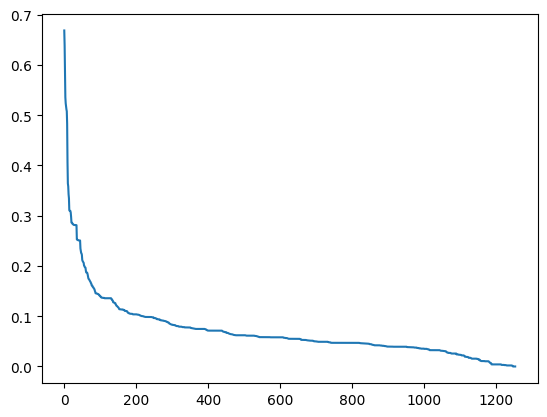

In [98]:
fig, ax = plt.subplots(1,1)
ax.plot(JS_dist_pd['jensen_shannon_dist'].values)

plt.show()

##### (!) существенные отличия в распределениях имеет не так много признаков

In [99]:
JS_dist_pd[JS_dist_pd['jensen_shannon_dist']>0.2]

,jensen_shannon_dist
Терапия1_ИМТ_ЗначениеПредставление,0.668456
Профессия,0.639031
Офтальмология1_Диагноз_ЗначениеПредставление,0.591787
Офтальмология1_ODДополнение_ЗначениеПредставление,0.535683
Офтальмология1_МКБ101,0.523506
Офтальмология1_ХР_Рекомендация1Представление,0.517350
Офтальмология1_OSДополнение_ЗначениеПредставление,0.511572
ДиспансернаяГруппаПредставление,0.507783
Офтальмология1_АнамнезДополнение_ЗначениеПредставление,0.483008
Цех,0.406711


## Модели

## 20.04.23 Модели по короткому набору признаков (только МКБ, вредные факторы и возраст)

In [100]:
q = sorted(data.columns[data.columns.str.contains('МКБ')].tolist())
q

['Гинекология1_МКБ101',
 'Гинекология1_МКБ102',
 'Гинекология2_МКБ101',
 'Гинекология2_МКБ102',
 'Гинекология3_МКБ101',
 'Гинекология3_МКБ102',
 'Гинекология4_МКБ101',
 'Гинекология4_МКБ102',
 'Дерматовенерология1_МКБ101',
 'Дерматовенерология1_МКБ102',
 'Дерматовенерология2_МКБ101',
 'Дерматовенерология2_МКБ102',
 'ЛабораторныеИсследования1_МКБ101',
 'ЛабораторныеИсследования1_МКБ102',
 'ЛабораторныеИсследования2_МКБ101',
 'ЛабораторныеИсследования2_МКБ102',
 'Неврология1_МКБ101',
 'Неврология1_МКБ102',
 'Неврология2_МКБ101',
 'Неврология2_МКБ102',
 'Оториноларингология1_МКБ101',
 'Оториноларингология1_МКБ102',
 'Оториноларингология1_МКБ103',
 'Оториноларингология1_МКБ104',
 'Оториноларингология2_МКБ101',
 'Оториноларингология2_МКБ102',
 'Оториноларингология2_МКБ103',
 'Оториноларингология2_МКБ104',
 'Оториноларингология3_МКБ101',
 'Офтальмология1_МКБ101',
 'Офтальмология1_МКБ102',
 'Офтальмология1_МКБ103',
 'Офтальмология1_МКБ104',
 'Офтальмология2_МКБ101',
 'Офтальмология2_МКБ102',


In [101]:
data_short = data[['КлиентДатаРождения', 'Профессия', 'ВредныеФакторы']+q]
data_short

,КлиентДатаРождения,Профессия,ВредныеФакторы,Гинекология1_МКБ101,Гинекология1_МКБ102,Гинекология2_МКБ101,Гинекология2_МКБ102,Гинекология3_МКБ101,Гинекология3_МКБ102,Гинекология4_МКБ101,...,ХирургНеИсп1_МКБ102,ХирургНеИсп2_МКБ101,ХирургНеИсп2_МКБ102,Хирургия1_МКБ101,Хирургия1_МКБ102,Хирургия2_МКБ101,Хирургия2_МКБ102,Хирургия3_МКБ101,ЭКГНеИсп1_МКБ101,Эндоскопия1_МКБ101
0,1976-10-24,Ведущий специалист по организации обуения,11.4,Z00.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1987-11-18,Ведущий специалист,4.2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1985-09-08,Главный менеджер,4.2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1988-04-25,Главный специалист,11.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984-04-17,Старший специалист,11.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z00.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1993-12-29,Инженер,"4.4,4.5,6.1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z00.0,NaN,NaN,NaN,NaN,NaN,NaN
1962,1989-07-10,Начальник лаборатории,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972,1987-02-04,"Инженер по бурению 1 категории, непосредственн...",3.1.8.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z00.0,NaN,NaN,NaN,NaN,NaN,NaN
1973,1993-02-04,Приемщик вагонов в депо,"4.2.5,6.1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z00.0,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
sorted(data_short['Профессия'].unique().tolist())

['Авиамеханик',
 'Авиамеханик ',
 'Авиамеханик Авиамеханик',
 'Авиатехник  ПиД',
 'Авиатехник АиРЭО',
 'Авиатехник ПиД',
 'Агент-комплектовщик',
 'Агроном 1 категории',
 'Администратор',
 'Администратор-кассир',
 'Анестезиолог',
 'Ассистент врача-стоматолога',
 'Бармен',
 'Барменеджер',
 'Бригадир',
 'Бригадир-электромонтажник по обслуживанию и ремонту электрооборудования',
 'Бригадир-электромонтер по обслуживанию и ремонту электрооборудования',
 'Бурильщик',
 'Бурильщик капитального ремонта скважин',
 'Бухгалтер',
 'Бухгалтер 1 категории',
 'Ведущий агроном',
 'Ведущий агроном по защите растений',
 'Ведущий агроном по семеноводству',
 'Ведущий бухгалтер',
 'Ведущий геодезист',
 'Ведущий геофизик',
 'Ведущий инженер',
 'Ведущий инженер ',
 'Ведущий инженер (топ оборудование)',
 'Ведущий инженер - проектировщик',
 'Ведущий инженер АиРЭО',
 'Ведущий инженер ПиД',
 'Ведущий инженер по бурению ',
 'Ведущий инженер по радиационной безопасности (класс вредности 3.1)',
 'Ведущий инженер по св

In [103]:
professions_count = data_short['Профессия'].value_counts()
print(len(professions_count))
professions_count

557


Ведущий агроном                           44
Инженер                                   37
Старший специалист                        34
Ведущий специалист                        32
Водитель автомобиля                       26
                                          ..
Слесарь-сборщик/водитель (смежная)         1
Слесарь КИПиА                              1
Мастер по капитальному ремонту скважин     1
Слесарь/водитель (смежная)                 1
Анестезиолог                               1
Name: Профессия, Length: 557, dtype: int64

In [104]:
professions_count[professions_count==1]

Наладчик станков и манипуляторов с программным управлением 5 разряд    1
Специалист по персоналу                                                1
Начальник отдела (3 класс)                                             1
Менеджер склада                                                        1
Менеджер по безопасности                                               1
                                                                      ..
Слесарь-сборщик/водитель (смежная)                                     1
Слесарь КИПиА                                                          1
Мастер по капитальному ремонту скважин                                 1
Слесарь/водитель (смежная)                                             1
Анестезиолог                                                           1
Name: Профессия, Length: 322, dtype: int64

#### 557 профессий, из которых 322 встречаются 1 раз. можно было бы как-то разбить профессии на группы, экспертно, или через похожесть их TfIdf-представлений, но пока предполагаю, что вся информация, потенциально содержащаяся в "профессиях", содержится и во "вредных факторах".

##### one-hot encoding кодов МКБ

In [105]:
X_MKB_onehot = pd.concat([pd.get_dummies(data[elem], dummy_na=True, prefix=elem) for elem in q],axis=1)
X_MKB_onehot

,Гинекология1_МКБ101_D25,Гинекология1_МКБ101_D25.9,Гинекология1_МКБ101_N60.2,Гинекология1_МКБ101_N80.0,Гинекология1_МКБ101_N83.2,Гинекология1_МКБ101_Z00.0,Гинекология1_МКБ101_nan,Гинекология1_МКБ102_D25.9,Гинекология1_МКБ102_H52.1,Гинекология1_МКБ102_Z00.0,...,Хирургия2_МКБ101_nan,Хирургия2_МКБ102_K40.9,Хирургия2_МКБ102_Z00.0,Хирургия2_МКБ102_nan,Хирургия3_МКБ101_nan,ЭКГНеИсп1_МКБ101_Z00.0,ЭКГНеИсп1_МКБ101_nan,Эндоскопия1_МКБ101_K26.7,Эндоскопия1_МКБ101_Z00.0,Эндоскопия1_МКБ101_nan
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1962,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1972,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1973,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1


In [106]:
X_MKB_onehot.sum().sort_values()

Неврология1_МКБ101_I11.9                1
Оториноларингология1_МКБ101_H52.1       1
Терапия1_МКБ102_M42.1                   1
Терапия1_МКБ101_K29.5                   1
Неврология2_МКБ101_I66.9                1
                                     ... 
ХирургНеИсп2_МКБ101_nan              1569
Оториноларингология3_МКБ101_nan      1570
ТерапевтНеИсп1_МКБ102_nan            1570
ЭКГНеИсп1_МКБ101_nan                 1570
Хирургия3_МКБ101_nan                 1571
Length: 363, dtype: int64

##### обработка столбца "возраст"

In [107]:
X_age = (data['ДатаЗавершенияМедосмотра']-data['КлиентДатаРождения']).apply(lambda x: np.round(x.total_seconds()/60/60/24/365.25,2))
#X_age.apply(lambda x: x.total_seconds()/60/60/24/365.25)
X_age

0       45.25
1       34.21
2       36.44
3       33.81
4       37.85
        ...  
1961    28.92
1962    33.39
1972    35.82
1973    29.82
1981    51.22
Length: 1571, dtype: float64

In [108]:
# quantile-based bins
qnum=10
qbins = pd.qcut(X_age,qnum)
qbins = pd.Series(qbins)
qbins

0       (43.61, 48.02]
1       (34.17, 36.99]
2       (34.17, 36.99]
3       (30.43, 34.17]
4       (36.99, 40.27]
             ...      
1961    (26.07, 30.43]
1962    (30.43, 34.17]
1972    (34.17, 36.99]
1973    (26.07, 30.43]
1981    (48.02, 53.27]
Length: 1571, dtype: category
Categories (10, interval[float64, right]): [(16.259, 26.07] < (26.07, 30.43] < (30.43, 34.17] <
                                            (34.17, 36.99] ... (43.61, 48.02] < (48.02, 53.27] <
                                            (53.27, 58.12] < (58.12, 71.89]]

In [109]:
X_age_extended = pd.concat([X_age,  qbins], axis=1)
X_age_extended.columns = ['age', 'age_quantiles']
X_age_extended.sort_values('age_quantiles')

,age,age_quantiles
1505,23.71,"(16.259, 26.07]"
370,25.24,"(16.259, 26.07]"
1678,25.33,"(16.259, 26.07]"
384,23.34,"(16.259, 26.07]"
403,24.88,"(16.259, 26.07]"
...,...,...
824,62.84,"(58.12, 71.89]"
443,66.49,"(58.12, 71.89]"
1820,60.85,"(58.12, 71.89]"
1600,60.94,"(58.12, 71.89]"


In [110]:
X_age_dummies = pd.get_dummies(X_age_extended['age_quantiles'])
X_age_dummies

,"(16.259, 26.07]","(26.07, 30.43]","(30.43, 34.17]","(34.17, 36.99]","(36.99, 40.27]","(40.27, 43.61]","(43.61, 48.02]","(48.02, 53.27]","(53.27, 58.12]","(58.12, 71.89]"
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1961,0,1,0,0,0,0,0,0,0,0
1962,0,0,1,0,0,0,0,0,0,0
1972,0,0,0,1,0,0,0,0,0,0
1973,0,1,0,0,0,0,0,0,0,0


In [111]:
X = pd.concat([X_age_dummies, X_adverse_factors.loc[data.index], X_MKB_onehot], axis=1 )
X

,"(16.259, 26.07]","(26.07, 30.43]","(30.43, 34.17]","(34.17, 36.99]","(36.99, 40.27]","(40.27, 43.61]","(43.61, 48.02]","(48.02, 53.27]","(53.27, 58.12]","(58.12, 71.89]",...,Хирургия2_МКБ101_nan,Хирургия2_МКБ102_K40.9,Хирургия2_МКБ102_Z00.0,Хирургия2_МКБ102_nan,Хирургия3_МКБ101_nan,ЭКГНеИсп1_МКБ101_Z00.0,ЭКГНеИсп1_МКБ101_nan,Эндоскопия1_МКБ101_K26.7,Эндоскопия1_МКБ101_Z00.0,Эндоскопия1_МКБ101_nan
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1962,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1972,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1973,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1


In [112]:
X.isna().sum().sum()

0

In [113]:
target

,yes,maybe,no
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
1961,1,0,0
1962,1,0,0
1972,1,0,0
1973,1,0,0


In [114]:
target[(target['maybe']==1)|(target['no']==1)]

,yes,maybe,no
2,0,1,0
4,0,1,0
6,0,1,0
10,0,1,0
19,0,1,0
...,...,...,...
1906,0,1,0
1921,0,1,0
1945,0,1,0
1947,0,1,0


#### LGBM with binary target

In [115]:
target_binary = target['maybe'] + target['no']
target_binary

0       0
1       0
2       1
3       0
4       1
       ..
1961    0
1962    0
1972    0
1973    0
1981    0
Length: 1571, dtype: int64

In [116]:
target_binary.value_counts()

0    1434
1     137
dtype: int64

In [117]:
model = lgbm.LGBMClassifier(is_unbalance=True)
cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)

res = cross_val_score(model, X.values, target_binary.values, cv=cv)

print(res.mean())
res


0.889242745930644


array([0.91111111, 0.89490446, 0.88853503, 0.88853503, 0.89171975,
       0.8984127 , 0.87579618, 0.87898089, 0.88853503, 0.88216561,
       0.86031746, 0.86942675, 0.91401274, 0.90127389, 0.87898089,
       0.8984127 , 0.88216561, 0.88535032, 0.89808917, 0.92675159,
       0.87619048, 0.87898089, 0.87261146, 0.89808917, 0.89171975])

In [118]:
model = lgbm.LGBMClassifier(class_weight='balanced')
cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)

res = cross_val_score(model, X.values, target_binary.values, cv=cv)

print(res.mean())
res

0.8855436255181479


array([0.90793651, 0.87898089, 0.88216561, 0.88853503, 0.87579618,
       0.90793651, 0.8566879 , 0.86942675, 0.90764331, 0.89171975,
       0.87301587, 0.84713376, 0.91401274, 0.90764331, 0.86624204,
       0.90793651, 0.87579618, 0.86624204, 0.88535032, 0.90127389,
       0.88571429, 0.88216561, 0.88535032, 0.88853503, 0.88535032])

In [119]:
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': 'balanced',
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [120]:
base_model = lgbm.LGBMClassifier()

param_gridsearch_0 = {
    'max_depth': [5,7,9],
    'scale_pos_weight': [1, 5, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2]

}

cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)
model = GridSearchCV(estimator = base_model, param_grid = param_gridsearch_0, cv = cv, n_jobs = 3, scoring = 'accuracy')
model.fit(X.values, target_binary.values)

print(model.best_score_)
print(model.best_params_)

0.9129220503488018
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 50, 'scale_pos_weight': 1, 'subsample': 0.7}


In [122]:
base_model = lgbm.LGBMClassifier()

param_gridsearch_0 = {
    'max_depth': [6,7,8],
    'scale_pos_weight': [1, 2],
    'subsample': [0.6, 0.7, 0.75],
    'colsample_bytree': [0.6, 0.7, 0.75],
    'n_estimators': [25, 50, 75],
    'learning_rate': [0.025, 0.05, 0.075]

}

cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)
model = GridSearchCV(estimator = base_model, param_grid = param_gridsearch_0, cv = cv, n_jobs = 3, scoring = 'accuracy')
model.fit(X.values, target_binary.values)

print(model.best_score_)
print(model.best_params_)

0.9145785057122634
{'colsample_bytree': 0.75, 'learning_rate': 0.025, 'max_depth': 8, 'n_estimators': 50, 'scale_pos_weight': 1, 'subsample': 0.6}


In [123]:
base_model = lgbm.LGBMClassifier(scale_pos_weight=1, n_estimators=50, colsample_bytree=0.75, max_depth=8)

param_gridsearch_0 = {
    'subsample': [0.55, 0.6, 0.65],
    'learning_rate': [0.02, 0.025, 0.03]

}

cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)
model = GridSearchCV(estimator = base_model, param_grid = param_gridsearch_0, cv = cv, n_jobs = 3, scoring = 'accuracy')
model.fit(X.values, target_binary.values)

print(model.best_score_)
print(model.best_params_)

0.9145785057122634
{'learning_rate': 0.025, 'subsample': 0.55}


####  (!) пока лучшая точность (accuracy по cross-val-score) классической ML модели (lgbm) по короткому набору признаков = 0,9146

#### neural network (binary target)

In [124]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(25, input_dim=X.shape[1], activation='relu'))
	#model.add(Dropout(0.25))
	#model.add(BatchNormalization())
	#model.add(Dense(25, activation='relu'))
	#model.add(Dropout(0.25))
	#model.add(BatchNormalization())
	model.add(Dense(10, activation='relu'))
	#model.add(Dropout(0.25))
	#model.add(BatchNormalization())	
	model.add(Dense(1, activation='sigmoid'))
 
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [125]:
cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)
estimator = KerasClassifier(model=baseline_model, epochs=200, batch_size=10, verbose=0)
res = cross_val_score(estimator, X.values, target_binary.values, cv=cv)

print(res.mean())
res

0.8919138610858356


array([0.9047619 , 0.90127389, 0.86305732, 0.87898089, 0.90127389,
       0.91746032, 0.88853503, 0.89490446, 0.89490446, 0.89808917,
       0.86984127, 0.88216561, 0.88216561, 0.92038217, 0.86305732,
       0.9015873 , 0.88216561, 0.9044586 , 0.86942675, 0.90127389,
       0.88253968, 0.89490446, 0.89171975, 0.89490446, 0.91401274])

In [127]:
# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(50, input_dim=X.shape[1], activation='relu'))
  model.add(Dropout(0.25))
  model.add(BatchNormalization())
  model.add(Dense(25, activation='relu'))
  model.add(Dropout(0.25))
  model.add(BatchNormalization())
  #model.add(Dense(25, activation='relu'))
  #model.add(Dropout(0.25))
  #model.add(BatchNormalization())
  model.add(Dense(10, activation='relu'))
  #model.add(Dropout(0.25))
  #model.add(BatchNormalization())	
  model.add(Dense(1, activation='sigmoid'))
 
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [128]:
cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)
estimator = KerasClassifier(model=baseline_model, epochs=500, batch_size=10, verbose=0)
res = cross_val_score(estimator, X.values, target_binary.values, cv=cv)

print(res.mean())
res

0.9026290567182288


array([0.89206349, 0.91401274, 0.91082803, 0.91401274, 0.88535032,
       0.7968254 , 0.91401274, 0.91401274, 0.91401274, 0.89808917,
       0.85079365, 0.91401274, 0.91401274, 0.91401274, 0.91082803,
       0.91111111, 0.91401274, 0.92356688, 0.90127389, 0.91082803,
       0.91111111, 0.88853503, 0.91401274, 0.92038217, 0.91401274])

# Дальнейшие планы:

*   строить ML и DL модели по более широкому набору признаков
*   пробовать более сложные архитектуры нейронок
*   (?) обработка текстовых полей (напр. профессия)






